###**Importuję bibliotekę pandas**

In [ ]:
import pandas as pd

Podstawową strukturą danych w bibliotece pandas jest **Data Frame** czyli inaczej ramka danych.



###**Tworzymy ramkę danych**

Ramkę danych możemy utworzyć ze zwykłego słownika języka Python.

Aby ramka danych została utworzona, wszytskie kolumny muszą mieć identyczną długość.

Nawet jeżeli będziemy mieli brakujące dane, muszą one być reprezentowane przez wartości *Nan* (*ang. Not a number*).



In [ ]:
df = pd.DataFrame({"column1": [1, 2, 3, 4, 5], "column2" : [6, 7, 8, 9, 10], "column3" : ["A", "B", "C", "D", "E"]})
df

,column1,column2,column3
0,1,6,A
1,2,7,B
2,3,8,C
3,4,9,D
4,5,10,E


###**Zwracamy typ obiektu df.**

In [ ]:
type(df)

pandas.core.frame.DataFrame

###**Wyświetlamy poczatek ramki danych - pierwsze pięć wierszy.**

In [ ]:
df.head()

,column1,column2,column3
0,1,6,A
1,2,7,B
2,3,8,C
3,4,9,D
4,5,10,E


Jeżeli podamy jako parametr medoty head jakąś liczbę - taka liczba wierszy zostanie zwrócona.

In [ ]:
df.head(3)

,column1,column2,column3
0,1,6,A
1,2,7,B
2,3,8,C


###**Wyświetlamy koniec ramki danych - ostatnie 5 wierszy**

In [ ]:
df.tail()

,column1,column2,column3
0,1,6,A
1,2,7,B
2,3,8,C
3,4,9,D
4,5,10,E


Podobnie jak w przypadku pracy z metodą *head()*, możemy zdefiniować liczbę wierszy, które chcemy aby zostały zwrócone.

In [ ]:
df.tail(3)

,column1,column2,column3
2,3,8,C
3,4,9,D
4,5,10,E


Jeżeli chcemy wyświetlić zawartość konkretnego elementu ramki danych, możemy to zrobić odwołując się przykładowo do danej kolumny.

Robimy to wpisując wewnątrz nawiasów kwadratowych nazwę danego elemntu - w tym przypadku nazwę kolumny.

In [ ]:
df["column1"]

,column1
0,1
1,2
2,3
3,4
4,5


Innym typem danych dostarczanym przez bibliotekę pandas jest **seria** (*ang. Series*)

Seria to typ danych, ktory posiada indeks.

mamy więc możliwość odwoływania się do poszczególnych elementów za pomocą **indeksów**.

In [ ]:
type(df["column1"])

pandas.core.series.Series

Pandas w dość łatwy sposób pozwala definiować warunki na wartościach zawartych w kolumnie.

Działanie takie umożliwia między innymi filtrowanie wartości.



###**Filtrowanie konkretnych wartości**

Zwrócone dane są typu Series, wartości z tej serii odpowiadają wynikowi porównania tego co pierwotnie się w serii znajdowało, względem wartoci, którą mamy po prawej stronie warunku.



In [ ]:
df["column1"] <=3

,column1
0,True
1,True
2,True
3,False
4,False


Mamy również możliwość potraktowania powyższego działania jako filtr - w efekcie zwrócona zostanie ranka danych, ktora będzie zawierała dane spełniajace warunek filtru.

In [ ]:
df[df["column1"] <=3]

,column1,column2,column3
0,1,6,A
1,2,7,B
2,3,8,C


###**Odwołanie do konkretnego wiersza**

Sposób na odwoływanie się do poszczególnych wierszy ramki danych.

Mam tu na myśli wiersze o indeksie numerycznym.

In [ ]:
df.iloc[0]

,0
column1,1
column2,6
column3,A


Możemy również odwołać się do konkretnego elementu ranki danych.

In [ ]:
df.iloc[0, 0]

1

Wyświetlimy wszystkie wiersze (:) kolumny o indeksie 0.

In [ ]:
df.iloc[:, 0]

,column1
0,1
1,2
2,3
3,4
4,5


###**Manipulacja indeksami.**



Indeks automatyczny - indeks utworzony na zakresie od 0 do 5 z krokiem 1.


In [ ]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [ ]:
df.set_index("column3")

,column1,column2
column3,,
A,1,6
B,2,7
C,3,8
D,4,9
E,5,10


Na tym etapie warto wskazać, iż większość metod w bibliotece pandas zwraca pewne tymczasowe wartości zmodyfikowanych ramek danych.

Zatem wykonanie takiej metody nie oznacza, że dokonujemy zmian w zmiennej df, tylko tworzymy nową ramkę danych, która będzie odpowienio zmodyfikowana względem tej, którą już mamy.

Jeżeli chcielibysmy wynik działania metody zapisać w ramce danych musimy działanie to przypisać do zmiennej df.

###**Odwołanie do wierwsza ramki danych o indeksie nienumerycznym.**

In [ ]:
df = df.set_index("column3")
df

,column1,column2
column3,,
A,1,6
B,2,7
C,3,8
D,4,9
E,5,10


In [ ]:
df.loc["A"]

,A
column1,1
column2,6


###**Modyfikacja danych**

###Uzupełnianie / zastępowanie danych

In [ ]:
df["column1"].loc["A"] = None
df

<ipython-input-5-f440377e5802>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["column1"].loc["A"] = None


,column1,column2
column3,,
A,NaN,6
B,2.0,7
C,3.0,8
D,4.0,9
E,5.0,10


In [ ]:
df["column1"]

,column1
column3,
A,NaN
B,2.0
C,3.0
D,4.0
E,5.0


Warto w tym miejscu zwrócić uwagę na dość istotną kwestię. Mianowicie kiedy uprzednio wyswietlaliśmy typ danych były one typu int64 czyli typ całkowitoliczbowy.

Po zmianie wartości "A" na typ "NaN" typ danych zmienił się na float64 czyli typ zmiennoprzecinkowy.

Wynika to z faktu, iż wartości None wymuszają niejako ten typ.

Dlatego też ranka danych została zmodyfikowana aby typ był odpowiedni.

###Inny przykład zastępowania danych

*Jak uzupełniać brakujące dane?*

Bardzo często w rzeczywistych przykładach zdarza nam się, że w niektorych kolumnach występują wartości *NaN*.

Do zastępowania wartości NaN możemy wykorzystać metodę *fillna()*

Stosując metodę fillna() możemy wybrać względem, której osi będziemy stosować podmianę wartości Nan na inną wartość.



In [ ]:
df.fillna(0)

,column1,column2
column3,,
A,0.0,6
B,2.0,7
C,3.0,8
D,4.0,9
E,5.0,10


In [ ]:
df

,column1,column2
column3,,
A,NaN,6
B,2.0,7
C,3.0,8
D,4.0,9
E,5.0,10


In [ ]:
df.fillna(0, inplace=True)
df

,column1,column2
column3,,
A,0.0,6
B,2.0,7
C,3.0,8
D,4.0,9
E,5.0,10


###**Sortowanie danych**

Ramki danych możemy sortować według indeksu i według wartości w poszczególnych kolumnach.


Żeby pokazać dzialanie metody index_sort sortuje malejąco.

In [ ]:
df.sort_index(ascending=False)

,column1,column2
column3,,
E,5.0,10
D,4.0,9
C,3.0,8
B,2.0,7
A,0.0,6


In [ ]:
df.sort_values(by="column1")

,column1,column2
column3,,
A,0.0,6
B,2.0,7
C,3.0,8
D,4.0,9
E,5.0,10


###**Wczytywanie danych do ramki danych z plików**

###Wczytanie danych z repozytorium git na serwisie github

In [ ]:
import os

###Sprawdzam ścieżkę

In [ ]:
!pwd

/content


###Tworzymy folder, do ktorego wczytujamy dane

In [ ]:
os.mkdir("data")

FileExistsError: [Errno 17] File exists: 'data'

###Zmieniam bierzącą ścieżkę właśnie na folder *data*

In [ ]:
os.chdir("data")

In [ ]:
!pwd

/content/data


###Klonuję repozytorium

In [ ]:
!git clone https://github.com/pszajows/dane_do_lekcji_o_pandasie.git

fatal: destination path 'dane_do_lekcji_o_pandasie' already exists and is not an empty directory.


###Listuję zawartość folderu

In [ ]:
!ls -l

total 4
drwxr-xr-x 3 root root 4096 Dec 31 08:02 dane_do_lekcji_o_pandasie


###Przechodzę do folderu

In [ ]:
os.chdir("dane_do_lekcji_o_pandasie")

In [ ]:
!pwd

/content/data/dane_do_lekcji_o_pandasie


Pobrany folder zawiera kilka plików z danymi w różnych formatach:

plik excel (.xlsx)

pliki csv (.csv) - kolumny rozdzielone przecinkami lub średnikami

plik tsv (.tsv) - kolumny rozdzielone są znakami tabulacji





In [ ]:
!ls

LICENSE		       przykladowe_dane.csv  przykladowe_dane.xlsx
przykladowe_dane2.csv  przykladowe_dane.tsv  README.md


###Wczytaniue danych z pliku excela

Dane w pliku excela zapisywane są w formacie binarnym.

In [ ]:
df = pd.read_excel("przykladowe_dane.xlsx")
df

,czas,czujnik,wartosc1,wartosc2
0,2020-01-01 00:00:00,A,-0.607761,-0.859827
1,2020-01-01 01:00:00,A,-0.498000,-0.103273
2,2020-01-01 02:00:00,A,-0.379683,-0.143352
3,2020-01-01 03:00:00,A,-0.254819,0.244113
4,2020-01-01 04:00:00,A,-0.125526,-0.014619
...,...,...,...,...
661,2020-01-14 16:00:00,B,-3.031181,-3.299770
662,2020-01-14 17:00:00,B,-3.300000,-2.378712
663,2020-01-14 18:00:00,B,-3.568819,-3.822281
664,2020-01-14 19:00:00,B,-3.820000,-4.064125


###Zwracamy typ przechowujący czas - Timestamp

(pojedynczy element serii)

Pojedynczy element serii *Timestamp* - znacznik czasu (binarna reprezentacja czasu, z której możemy uzyskać infoamcję o roku, miesiacu, dniu, godzinie itd.)

In [ ]:
type(df["czas"].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

###Wczytujemy dane z pliku tekstowego, w którym kolumny rozdzielimy przecinkami, a znakiem dzisiętnym będzie znak "."


In [ ]:
df = pd.read_csv("przykladowe_dane.csv")
df

,czas,czujnik,wartosc1,wartosc2
0,2020-01-01 0:00,A,-0.607761,-0.859827
1,2020-01-01 1:00,A,-0.498000,-0.103273
2,2020-01-01 2:00,A,-0.379683,-0.143352
3,2020-01-01 3:00,A,-0.254819,0.244113
4,2020-01-01 4:00,A,-0.125526,-0.014619
...,...,...,...,...
661,2020-01-14 16:00,B,-3.031181,-3.299770
662,2020-01-14 17:00,B,-3.300000,-2.378712
663,2020-01-14 18:00,B,-3.568819,-3.822281
664,2020-01-14 19:00,B,-3.820000,-4.064125


Sprawdźmy typ danych przechowywanych w kolumnie *czas*.

In [ ]:
type(df["czas"].iloc[0])

str

Jak możemy zauwazyć zwracany typ danych to *string*.

Bardzo istotne jest to, by wszystkie dane czasowe przechowywane były w odpowiednim formacie - wskazującym, iż jest to czas i pozwalał nam tę zmienną przetwarzać.



Konieczne zatem jest przekonwertowanie wartości tekstowych na wartości w odpowiednim formacie - Timestamp (format czasu).

In [ ]:
pd.to_datetime(df["czas"])

,czas
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
661,2020-01-14 16:00:00
662,2020-01-14 17:00:00
663,2020-01-14 18:00:00
664,2020-01-14 19:00:00


In [ ]:
pd.to_datetime(df["czas"]).iloc[0]

Timestamp('2020-01-01 00:00:00')

###Inny, rekomendowany sposób przekonwertrowania danych

Przetwarzanie danych zawartych w ranmce danych za pomocą metody *apply()*.

Metodę tę można stosować na ramkach danych jak i na seriach.

In [ ]:
df["czas"] = df["czas"].apply(pd.to_datetime)
df

,czas,czujnik,wartosc1,wartosc2
0,2020-01-01 00:00:00,A,-0.607761,-0.859827
1,2020-01-01 01:00:00,A,-0.498000,-0.103273
2,2020-01-01 02:00:00,A,-0.379683,-0.143352
3,2020-01-01 03:00:00,A,-0.254819,0.244113
4,2020-01-01 04:00:00,A,-0.125526,-0.014619
...,...,...,...,...
661,2020-01-14 16:00:00,B,-3.031181,-3.299770
662,2020-01-14 17:00:00,B,-3.300000,-2.378712
663,2020-01-14 18:00:00,B,-3.568819,-3.822281
664,2020-01-14 19:00:00,B,-3.820000,-4.064125


###Działanie funkcji *to_datetime()*

In [ ]:
pd.to_datetime("1.01.2020")

Timestamp('2020-01-01 00:00:00')

In [ ]:
pd.to_datetime("97-12-02")

Timestamp('1997-12-02 00:00:00')

In [ ]:
pd.to_datetime("04/12/1967")

Timestamp('1967-04-12 00:00:00')

In [ ]:
pd.to_datetime("04|12|1967", format= "%m|%d|%Y")


Timestamp('1967-04-12 00:00:00')

###Wczytujemy dane z pliku tekstowego, w którym kolumny rozdzielimy średnikami, a znakiem dzisiętnym będzie znak ","

Ważne by zaraz po wczytaniu danych, wyświetlić ich zawartość.

W ten sposób jesteśmy w stanie zweryfikować, przynajmniej wstępnie czy nasze dane zostały wczytane poprawnie.

Mamy jedną kolumnę, która składa się z nazw wszytkich kolumn, które były przewidziane i pomiędzy, którymi znajdują się średniki.

Jest to bardzo dobry przykład ranki danych, ktora posiada więcej niż jeden indeks tak zwany **multiindeks**.

In [ ]:
df = pd.read_csv("przykladowe_dane2.csv")
df

,,czas;czujnik;wartosc1;wartosc2
2020-01-01 0:00;A;-0,607761429;-0,8.598270e+09
2020-01-01 1:00;A;-0,498;-0,1.032729e+09
2020-01-01 2:00;A;-0,3796834324;-0,1.433520e+09
2020-01-01 3:00;A;-0,2548190451;0,2.441130e+09
2020-01-01 4:00;A;-0,1255261922;-0,1.461933e+09
...,...,...
2020-01-14 16:00;B;-3,031180955;-3,2.997704e+07
2020-01-14 17:00;B;-3,3;-2,3.787124e+08
2020-01-14 18:00;B;-3,568819045;-3,8.222815e+08
2020-01-14 19:00;B;-3,82;-4,6.412534e+07


In [ ]:
df = pd.read_csv("przykladowe_dane2.csv", sep=";", decimal=',')
df

,czas,czujnik,wartosc1,wartosc2
0,2020-01-01 0:00,A,-0.607761,-0.859827
1,2020-01-01 1:00,A,-0.498000,-0.103273
2,2020-01-01 2:00,A,-0.379683,-0.143352
3,2020-01-01 3:00,A,-0.254819,0.244113
4,2020-01-01 4:00,A,-0.125526,-0.014619
...,...,...,...,...
661,2020-01-14 16:00,B,-3.031181,-3.299770
662,2020-01-14 17:00,B,-3.300000,-2.378712
663,2020-01-14 18:00,B,-3.568819,-3.822281
664,2020-01-14 19:00,B,-3.820000,-4.064125


In [ ]:
df["czas"] = df["czas"].apply(pd.to_datetime)
df

,czas,czujnik,wartosc1,wartosc2
0,2020-01-01 00:00:00,A,-0.607761,-0.859827
1,2020-01-01 01:00:00,A,-0.498000,-0.103273
2,2020-01-01 02:00:00,A,-0.379683,-0.143352
3,2020-01-01 03:00:00,A,-0.254819,0.244113
4,2020-01-01 04:00:00,A,-0.125526,-0.014619
...,...,...,...,...
661,2020-01-14 16:00:00,B,-3.031181,-3.299770
662,2020-01-14 17:00:00,B,-3.300000,-2.378712
663,2020-01-14 18:00:00,B,-3.568819,-3.822281
664,2020-01-14 19:00:00,B,-3.820000,-4.064125


###Wczytujemy dane z pliku tekstowego, w którym kolumny rozdzielimy tabulatorami.

In [ ]:
df = pd.read_csv("przykladowe_dane.tsv", sep="\t")
df

,czas,czujnik,wartosc1,wartosc2
0,2020-01-01 0:00,A,-0.607761,-0.859827
1,2020-01-01 1:00,A,-0.498000,-0.103273
2,2020-01-01 2:00,A,-0.379683,-0.143352
3,2020-01-01 3:00,A,-0.254819,0.244113
4,2020-01-01 4:00,A,-0.125526,-0.014619
...,...,...,...,...
661,2020-01-14 16:00,B,-3.031181,-3.299770
662,2020-01-14 17:00,B,-3.300000,-2.378712
663,2020-01-14 18:00,B,-3.568819,-3.822281
664,2020-01-14 19:00,B,-3.820000,-4.064125


In [ ]:
df["czas"] = df["czas"].apply(pd.to_datetime)
df

,czas,czujnik,wartosc1,wartosc2
0,2020-01-01 00:00:00,A,-0.607761,-0.859827
1,2020-01-01 01:00:00,A,-0.498000,-0.103273
2,2020-01-01 02:00:00,A,-0.379683,-0.143352
3,2020-01-01 03:00:00,A,-0.254819,0.244113
4,2020-01-01 04:00:00,A,-0.125526,-0.014619
...,...,...,...,...
661,2020-01-14 16:00:00,B,-3.031181,-3.299770
662,2020-01-14 17:00:00,B,-3.300000,-2.378712
663,2020-01-14 18:00:00,B,-3.568819,-3.822281
664,2020-01-14 19:00:00,B,-3.820000,-4.064125


###**Funkcja grupująca group_by()**

Uruchamiając tę metodę w takiej postaci na wyjściu otrzymamy obiekt *DataFrameGroupBy* - specjalna klasa, która reprezentuje pogrupowaną ramkę danych.

Pogrupowana ranka danych może być wejściem do kolejnej funkcji, która coś z tak pogrupowanymi danymi będzie chciała  zrobić.

In [ ]:
df.groupby("czujnik")

###Zwracamy wartość średnią dla pogrupowanych czujników A i B.

In [ ]:
df.groupby("czujnik").mean()

,czas,wartosc1,wartosc2
czujnik,,,
A,2020-01-07 22:00:00,0.174107,0.169669
B,2020-01-07 22:00:00,-1.661496,-1.702870


###Inne wartości:

In [ ]:
df.groupby("czujnik").max()

,czas,wartosc1,wartosc2
czujnik,,,
A,2020-01-14 20:00:00,1.306,2.167838
B,2020-01-14 20:00:00,0.880,1.560209


In [ ]:
df.groupby("czujnik").min()

,czas,wartosc1,wartosc2
czujnik,,,
A,2020-01-01,-0.958,-1.738732
B,2020-01-01,-4.120,-5.040229


###**Co zrobić żeby naszą ramkę danych potraktować jak szereg czasowy i policzyć średnią ruchomą dla wartości rejestrowanych na poszczególnych czujnikach?**



W naszej ramce dancyh ustawiamy czas jako indeks, a wartości 1 i 2 dla czujnika A i B postawić koło siebie

Na poczatku ustawiamy jako indeks - czas, nastepnie kolejne metody będziemy wywoływać na na ramce, która została zwrocona jako wynik działania poprzedniej metody.


W metodzie *pivot()* musimy okreslić, która kolumna będzie zawierala wartości, które ma stanowić podstawę do utworzenia kolejnych kolumn - parametr *columns*.

Na końcu musimy podac, które kolumny mają zostać zamienione na wartości - parametr *values* - które kolumny będa stanowiły wartości nowych kolumn.



Finalnie zamieniliśmy naszą rankę danych na szereg czasowy.

In [ ]:
df = df.set_index("czas").pivot(columns="czujnik", values = ["wartosc1", "wartosc2"])
df

wartosc1            wartosc2          
czujnik                     A         B         A         B
czas                                                       
2020-01-01 00:00:00 -0.607761 -0.975926 -0.859827 -1.199280
2020-01-01 01:00:00 -0.498000 -0.886025 -0.103273 -0.170942
2020-01-01 02:00:00 -0.379683 -0.737107 -0.143352 -0.052968
2020-01-01 03:00:00 -0.254819 -0.540000  0.244113 -0.604446
2020-01-01 04:00:00 -0.125526 -0.308819 -0.014619 -0.537402
...                       ...       ...       ...       ...
2020-01-14 16:00:00 -0.662445 -3.031181 -1.283670 -3.299770
2020-01-14 17:00:00 -0.670000 -3.300000 -0.534363 -2.378712
2020-01-14 18:00:00 -0.660445 -3.568819 -0.369139 -3.822281
2020-01-14 19:00:00 -0.633926 -3.820000 -1.486740 -4.064125
2020-01-14 20:00:00 -0.590880 -4.037107 -1.071481 -4.190519

[333 rows x 4 columns]

###Następnie spróbujmy pogrupować dane czasowo - uśrednijmy dane z kolejnych dni.

Przykładowo: średnia z dnia pierwszego, średnia z dnia drugiego itd.

Parametrem podanym w resample regulujemy granularność szeregu czasowego.



In [ ]:
df = df.resample("1d").mean()
df

wartosc1            wartosc2          
czujnik            A         B         A         B
czas                                              
2020-01-01  0.491478 -0.125000  0.558850 -0.200775
2020-01-02 -0.442478 -0.365000 -0.355418 -0.358134
2020-01-03  0.539478 -0.605000  0.508580 -0.638511
2020-01-04 -0.394478 -0.845000 -0.153080 -1.004233
2020-01-05  0.587478 -1.085000  0.447647 -1.018735
2020-01-06 -0.346478 -1.325000 -0.454926 -1.237651
2020-01-07  0.635478 -1.565000  0.576998 -1.643572
2020-01-08 -0.298478 -1.805000 -0.347148 -1.819773
2020-01-09  0.683478 -2.045000  0.742483 -2.058229
2020-01-10 -0.250478 -2.285000 -0.439765 -2.347224
2020-01-11  0.731478 -2.525000  0.820703 -2.683875
2020-01-12 -0.202478 -2.765000 -0.075832 -2.656877
2020-01-13  0.779478 -3.005000  0.831412 -3.161450
2020-01-14 -0.111714 -3.095145 -0.350114 -3.198031

###**Średnia ruchoma** *(ang. moving avrage, rolling avrage)*

Funkcją agregującą jest metoda *rolling()*.

Agregowanie danych w okienkach czasowych.

W tym przypadku okienko czasowe wynosi 5h.

In [ ]:
df = df.set_index("czas").pivot(columns="czujnik", values = ["wartosc1", "wartosc2"]).rolling(5).mean()

In [ ]:
df

wartosc1            wartosc2          
czujnik                  A         B         A         B
czas                                                    
2020-01-01 0:00        NaN       NaN       NaN       NaN
2020-01-01 10:00       NaN       NaN       NaN       NaN
2020-01-01 11:00       NaN       NaN       NaN       NaN
2020-01-01 12:00       NaN       NaN       NaN       NaN
2020-01-01 13:00  0.483497  0.464390  0.376092  0.556132
...                    ...       ...       ...       ...
2020-01-14 5:00   0.289430 -3.632607  0.079462 -4.007108
2020-01-14 6:00   0.445300 -3.411421  0.197083 -3.664165
2020-01-14 7:00   0.318000 -3.180000 -0.087848 -3.510907
2020-01-14 8:00   0.190700 -2.948579 -0.359677 -3.218667
2020-01-14 9:00   0.065594 -2.733610 -0.386263 -2.976833

[333 rows x 4 columns]

W rezultacie otrzymujemy wartości rolującej się / poruszajacej się średniej.

###**Wizualizacja ranki danych**

###**Import biblioteki matplotlib, moduł pyplot**

In [ ]:
import matplotlib.pyplot as plt

###Okreslamy rozmiar wykresu

(Wymiary wykresu podajemy w umownych jednostkach.)

(Pierwsza wartość to szerokość, a druga to wysokość.)

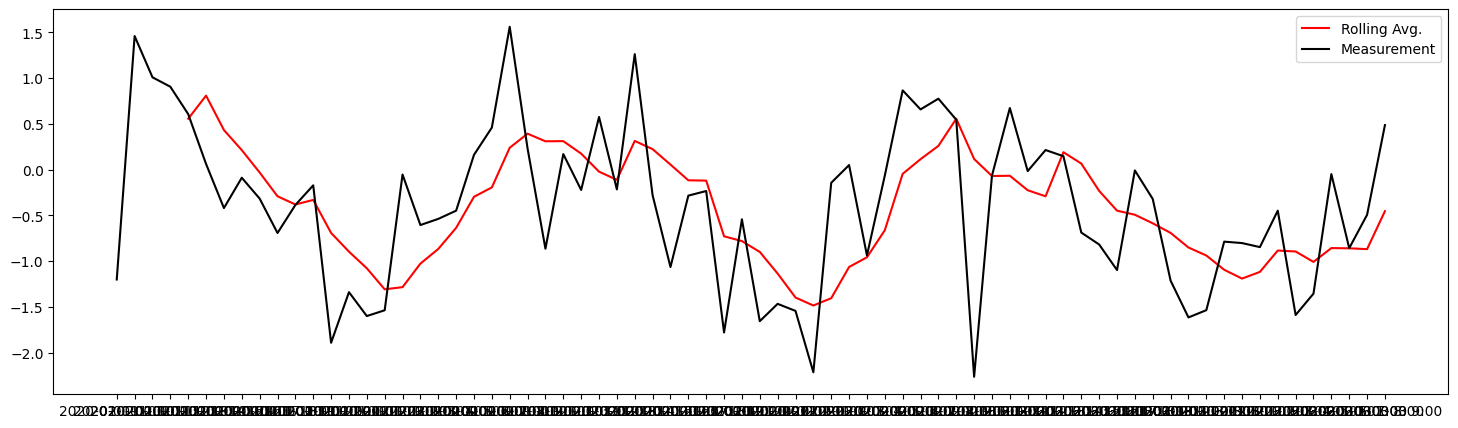

In [ ]:
plt.figure(figsize=(18, 5))
plt.plot(df.set_index("czas").pivot(columns="czujnik", values = ["wartosc1", "wartosc2"]).rolling(5).mean()["wartosc2"]["B"][:72], label= "Rolling Avg.", color="red")
plt.plot(df.set_index("czas").pivot(columns="czujnik", values = ["wartosc1", "wartosc2"])["wartosc2"]["B"][:72], label= "Measurement", color="black")
plt.legend()
pass

Średnia ruchoma nieco wygładza warości szeregu czasowego.


###**Przykład**

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [ ]:
start_date = "2023-01-1"
end_date = "2023-12-31"

In [ ]:
data = yf.download(tickers="TSLA", start=start_date, end=end_date)
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2023-01-03,108.099998,118.800003,104.639999,118.470001,231402800
2023-01-04,113.639999,114.589996,107.519997,109.110001,180389000
2023-01-05,110.339996,111.750000,107.160004,110.510002,157986300
2023-01-06,113.059998,114.389999,101.809998,103.000000,220911100
2023-01-09,119.769997,123.519997,117.110001,118.959999,190284000
...,...,...,...,...,...
2023-12-22,252.539993,258.220001,251.369995,256.760010,93249800
2023-12-26,256.609985,257.970001,252.910004,254.490005,86892400


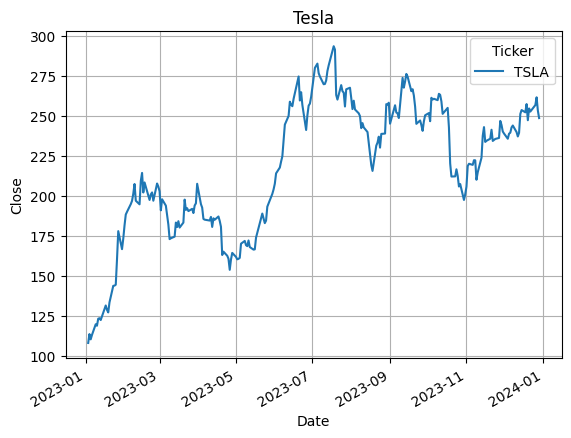

In [ ]:
close = data['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
ax.grid()
plt.show()